In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [2]:
import sys
import logging
import gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")
%matplotlib inline 

In [3]:
# Papermill notebook parameters

#############
# gymid = 'CyberBattleTiny-v0'
#############
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
#############
# gymid = "CyberBattleChain-v0"
# env_size = 10
# iteration_count = 9000
# training_episode_count = 50
# eval_episode_count = 5
# maximum_node_count = 22
# maximum_total_credentials = 22

In [4]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
env_size = 10


In [5]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

In [6]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0 = gym_env.reset()
    o_test, r, d, i = gym_env.step(gym_env.sample_valid_action())
    o0 = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a, None)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 831|reward: 6296.0|last_reward_at:  831|Elapsed Time: 0:00:02||


  Episode 1 ended at t=831 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/330 (0.06)
    explore-remote: 20/450 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 90
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8363, 


Episode 2|Iteration 1104|reward: 6310.0|last_reward_at: 1104|Elapsed Time: 0:00:03||


  Episode 2 ended at t=1104 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/448 (0.04)
    explore-remote: 20/604 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 217
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.7593, 


Episode 3|Iteration 331|reward: 6298.0|last_reward_at:  331|Elapsed Time: 0:00:00||


  Episode 3 ended at t=331 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/119 (0.15)
    explore-remote: 19/161 (0.11)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 79
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.7379, 


Episode 4|Iteration 913|reward: 6296.0|last_reward_at:  913|Elapsed Time: 0:00:03||


  Episode 4 ended at t=913 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/420 (0.05)
    explore-remote: 20/442 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 274
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.6822, 


Episode 5|Iteration 880|reward: 6304.0|last_reward_at:  880|Elapsed Time: 0:00:03||


  Episode 5 ended at t=880 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/368 (0.05)
    explore-remote: 20/460 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 282
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.6332, 


Episode 6|Iteration 857|reward: 6304.0|last_reward_at:  857|Elapsed Time: 0:00:03||


  Episode 6 ended at t=857 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/371 (0.05)
    explore-remote: 20/434 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 329
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.5894, 


Episode 7|Iteration 546|reward: 6292.0|last_reward_at:  546|Elapsed Time: 0:00:02||


  Episode 7 ended at t=546 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/202 (0.09)
    explore-remote: 19/294 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 228
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.5634, 


Episode 8|Iteration 976|reward: 6296.0|last_reward_at:  976|Elapsed Time: 0:00:03||


  Episode 8 ended at t=976 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/400 (0.05)
    explore-remote: 20/525 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 452
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.5203, 


Episode 9|Iteration 568|reward: 6278.0|last_reward_at:  568|Elapsed Time: 0:00:02||


  Episode 9 ended at t=568 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/233 (0.08)
    explore-remote: 18/287 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 269
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.4971, 


Episode 10|Iteration 694|reward: 6304.0|last_reward_at:  694|Elapsed Time: 0:00:02||


  Episode 10 ended at t=694 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/288 (0.06)
    explore-remote: 20/355 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 338
simulation ended


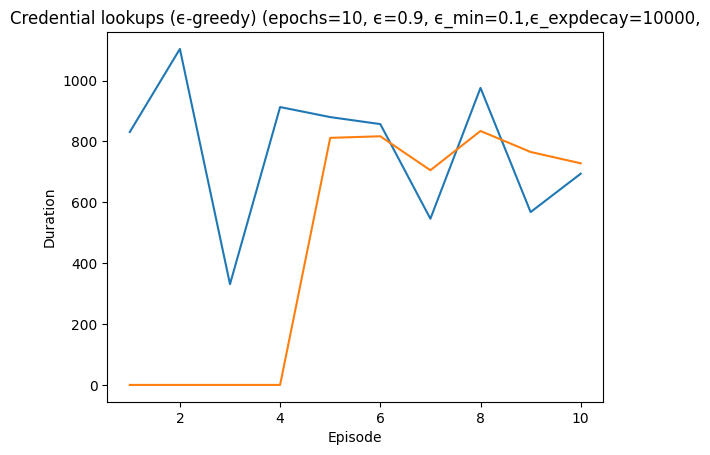

In [7]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)

In [8]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning"
)

###### Tabular Q-learning
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/50 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 825|reward: 6304.0|last_reward_at:  825|Elapsed Time: 0:00:04||


  Episode 1 ended at t=825 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/212 (0.08)
    explore-remote: 20/248 (0.07)
    explore-connect: 0/271 (0.00)
    exploit-local: 3/13 (0.19)
    exploit-remote: 0/29 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 86
  ## Episode: 2/50 'Tabular Q-learning' ϵ=0.7648, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 1206|reward: 6282.0|last_reward_at: 1206|Elapsed Time: 0:00:05||


  Episode 2 ended at t=1206 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/244 (0.05)
    explore-remote: 14/335 (0.04)
    explore-connect: 0/343 (0.00)
    exploit-local: 7/16 (0.30)
    exploit-remote: 4/219 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 143
  ## Episode: 3/50 'Tabular Q-learning' ϵ=0.6030, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 404|reward: 6272.0|last_reward_at:  404|Elapsed Time: 0:00:01||


  Episode 3 ended at t=404 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/105 (0.12)
    explore-remote: 18/116 (0.13)
    explore-connect: 0/130 (0.00)
    exploit-local: 4/2 (0.67)
    exploit-remote: 1/3 (0.25)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 148
  ## Episode: 4/50 'Tabular Q-learning' ϵ=0.5570, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 735|reward: 6294.0|last_reward_at:  735|Elapsed Time: 0:00:03||


  Episode 4 ended at t=735 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/194 (0.07)
    explore-remote: 19/212 (0.08)
    explore-connect: 0/238 (0.00)
    exploit-local: 6/13 (0.32)
    exploit-remote: 0/27 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 294
  ## Episode: 5/50 'Tabular Q-learning' ϵ=0.4822, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 514|reward: 6290.0|last_reward_at:  514|Elapsed Time: 0:00:02||


  Episode 5 ended at t=514 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/122 (0.10)
    explore-remote: 18/153 (0.11)
    explore-connect: 0/169 (0.00)
    exploit-local: 5/8 (0.38)
    exploit-remote: 2/12 (0.14)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 238
  ## Episode: 6/50 'Tabular Q-learning' ϵ=0.4361, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 1026|reward: 6302.0|last_reward_at: 1026|Elapsed Time: 0:00:04||


  Episode 6 ended at t=1026 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/252 (0.06)
    explore-remote: 17/344 (0.05)
    explore-connect: 0/318 (0.00)
    exploit-local: 5/5 (0.50)
    exploit-remote: 3/56 (0.05)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 518
  ## Episode: 7/50 'Tabular Q-learning' ϵ=0.3570, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 494|reward: 6286.0|last_reward_at:  494|Elapsed Time: 0:00:02||


  Episode 7 ended at t=494 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/112 (0.10)
    explore-remote: 18/162 (0.10)
    explore-connect: 0/152 (0.00)
    exploit-local: 7/2 (0.78)
    exploit-remote: 1/17 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 291
  ## Episode: 8/50 'Tabular Q-learning' ϵ=0.3244, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 911|reward: 6278.0|last_reward_at:  911|Elapsed Time: 0:00:04||


  Episode 8 ended at t=911 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/243 (0.05)
    explore-remote: 17/286 (0.06)
    explore-connect: 0/307 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 1/27 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 598
  ## Episode: 9/50 'Tabular Q-learning' ϵ=0.2720, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 565|reward: 6286.0|last_reward_at:  565|Elapsed Time: 0:00:02||


  Episode 9 ended at t=565 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/132 (0.09)
    explore-remote: 16/179 (0.08)
    explore-connect: 0/173 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 2/32 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 376
  ## Episode: 10/50 'Tabular Q-learning' ϵ=0.2440, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 676|reward: 6286.0|last_reward_at:  676|Elapsed Time: 0:00:03||


  Episode 10 ended at t=676 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/158 (0.08)
    explore-remote: 17/214 (0.07)
    explore-connect: 0/218 (0.00)
    exploit-local: 7/8 (0.47)
    exploit-remote: 2/28 (0.07)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 483
  ## Episode: 11/50 'Tabular Q-learning' ϵ=0.2144, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 594|reward: 6290.0|last_reward_at:  594|Elapsed Time: 0:00:02||


  Episode 11 ended at t=594 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/131 (0.07)
    explore-remote: 16/143 (0.10)
    explore-connect: 0/175 (0.00)
    exploit-local: 10/72 (0.12)
    exploit-remote: 4/22 (0.15)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 339
  ## Episode: 12/50 'Tabular Q-learning' ϵ=0.1915, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 474|reward: 6286.0|last_reward_at:  474|Elapsed Time: 0:00:02||


  Episode 12 ended at t=474 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/92 (0.09)
    explore-remote: 18/134 (0.12)
    explore-connect: 0/154 (0.00)
    exploit-local: 10/30 (0.25)
    exploit-remote: 2/14 (0.12)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 312
  ## Episode: 13/50 'Tabular Q-learning' ϵ=0.1751, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 333|reward: 6282.0|last_reward_at:  333|Elapsed Time: 0:00:01||


  Episode 13 ended at t=333 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/56 (0.11)
    explore-remote: 19/69 (0.22)
    explore-connect: 0/83 (0.00)
    exploit-local: 13/75 (0.15)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 182
  ## Episode: 14/50 'Tabular Q-learning' ϵ=0.1645, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 493|reward: 6260.0|last_reward_at:  493|Elapsed Time: 0:00:02||


  Episode 14 ended at t=493 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/121 (0.08)
    explore-remote: 17/137 (0.11)
    explore-connect: 0/190 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 405
  ## Episode: 15/50 'Tabular Q-learning' ϵ=0.1500, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 386|reward: 6264.0|last_reward_at:  386|Elapsed Time: 0:00:01||


  Episode 15 ended at t=386 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/74 (0.07)
    explore-remote: 15/85 (0.15)
    explore-connect: 0/95 (0.00)
    exploit-local: 13/87 (0.13)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 232
  ## Episode: 16/50 'Tabular Q-learning' ϵ=0.1396, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 464|reward: 6278.0|last_reward_at:  464|Elapsed Time: 0:00:02||


  Episode 16 ended at t=464 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/91 (0.10)
    explore-remote: 18/131 (0.12)
    explore-connect: 0/141 (0.00)
    exploit-local: 10/37 (0.21)
    exploit-remote: 0/15 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 326
  ## Episode: 17/50 'Tabular Q-learning' ϵ=0.1281, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 540|reward: 6276.0|last_reward_at:  540|Elapsed Time: 0:00:02||


  Episode 17 ended at t=540 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/115 (0.10)
    explore-remote: 17/149 (0.10)
    explore-connect: 0/171 (0.00)
    exploit-local: 7/19 (0.27)
    exploit-remote: 1/37 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 402
  ## Episode: 18/50 'Tabular Q-learning' ϵ=0.1160, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 478|reward: 6300.0|last_reward_at:  478|Elapsed Time: 0:00:02||


  Episode 18 ended at t=478 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/114 (0.11)
    explore-remote: 20/144 (0.12)
    explore-connect: 0/168 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 405
  ## Episode: 19/50 'Tabular Q-learning' ϵ=0.1063, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 815|reward: 6290.0|last_reward_at:  815|Elapsed Time: 0:00:04||


  Episode 19 ended at t=815 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/150 (0.09)
    explore-remote: 19/186 (0.09)
    explore-connect: 0/202 (0.00)
    exploit-local: 6/29 (0.17)
    exploit-remote: 1/197 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 494
  ## Episode: 20/50 'Tabular Q-learning' ϵ=0.0918, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 606|reward: 6300.0|last_reward_at:  606|Elapsed Time: 0:00:03||


  Episode 20 ended at t=606 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/127 (0.07)
    explore-remote: 20/161 (0.11)
    explore-connect: 0/168 (0.00)
    exploit-local: 11/38 (0.22)
    exploit-remote: 0/60 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 427
  ## Episode: 21/50 'Tabular Q-learning' ϵ=0.0825, γ=0.015,learning_rate=0.01,Q%=100


Episode 21|Iteration 661|reward: 6296.0|last_reward_at:  661|Elapsed Time: 0:00:02||


  Episode 21 ended at t=661 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/132 (0.08)
    explore-remote: 20/183 (0.10)
    explore-connect: 0/215 (0.00)
    exploit-local: 9/66 (0.12)
    exploit-remote: 0/13 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 509
  ## Episode: 22/50 'Tabular Q-learning' ϵ=0.0735, γ=0.015,learning_rate=0.01,Q%=100


Episode 22|Iteration 905|reward: 6294.0|last_reward_at:  905|Elapsed Time: 0:00:04||


  Episode 22 ended at t=905 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/176 (0.09)
    explore-remote: 17/227 (0.07)
    explore-connect: 0/259 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 2/192 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 637
  ## Episode: 23/50 'Tabular Q-learning' ϵ=0.0630, γ=0.015,learning_rate=0.01,Q%=100


Episode 23|Iteration 540|reward: 6286.0|last_reward_at:  540|Elapsed Time: 0:00:02||


  Episode 23 ended at t=540 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/121 (0.09)
    explore-remote: 20/177 (0.10)
    explore-connect: 0/192 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 484
  ## Episode: 24/50 'Tabular Q-learning' ϵ=0.0576, γ=0.015,learning_rate=0.01,Q%=100


Episode 24|Iteration 362|reward: 6274.0|last_reward_at:  362|Elapsed Time: 0:00:01||


  Episode 24 ended at t=362 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/89 (0.11)
    explore-remote: 19/104 (0.15)
    explore-connect: 0/121 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 323
  ## Episode: 25/50 'Tabular Q-learning' ϵ=0.0543, γ=0.015,learning_rate=0.01,Q%=100


Episode 25|Iteration 355|reward: 6286.0|last_reward_at:  355|Elapsed Time: 0:00:01||


  Episode 25 ended at t=355 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/79 (0.12)
    explore-remote: 18/86 (0.17)
    explore-connect: 0/125 (0.00)
    exploit-local: 9/16 (0.36)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 297
  ## Episode: 26/50 'Tabular Q-learning' ϵ=0.0512, γ=0.015,learning_rate=0.01,Q%=100


Episode 26|Iteration 693|reward: 6282.0|last_reward_at:  693|Elapsed Time: 0:00:03||


  Episode 26 ended at t=693 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/155 (0.05)
    explore-remote: 18/201 (0.08)
    explore-connect: 0/213 (0.00)
    exploit-local: 12/74 (0.14)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 566
  ## Episode: 27/50 'Tabular Q-learning' ϵ=0.0459, γ=0.015,learning_rate=0.01,Q%=100


Episode 27|Iteration 844|reward: 6298.0|last_reward_at:  844|Elapsed Time: 0:00:06||


  Episode 27 ended at t=844 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 16/217 (0.07)
    explore-remote: 20/302 (0.06)
    explore-connect: 0/273 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 797
  ## Episode: 28/50 'Tabular Q-learning' ϵ=0.0403, γ=0.015,learning_rate=0.01,Q%=100


Episode 28|Iteration 529|reward: 6296.0|last_reward_at:  529|Elapsed Time: 0:00:03||


  Episode 28 ended at t=529 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/142 (0.10)
    explore-remote: 20/150 (0.12)
    explore-connect: 0/185 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 490
  ## Episode: 29/50 'Tabular Q-learning' ϵ=0.0373, γ=0.015,learning_rate=0.01,Q%=100


Episode 29|Iteration 584|reward: 6294.0|last_reward_at:  584|Elapsed Time: 0:00:03||


  Episode 29 ended at t=584 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/134 (0.07)
    explore-remote: 20/152 (0.12)
    explore-connect: 0/180 (0.00)
    exploit-local: 11/66 (0.14)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 484
  ## Episode: 30/50 'Tabular Q-learning' ϵ=0.0343, γ=0.015,learning_rate=0.01,Q%=100


Episode 30|Iteration 373|reward: 6272.0|last_reward_at:  373|Elapsed Time: 0:00:02||


  Episode 30 ended at t=373 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/91 (0.12)
    explore-remote: 17/106 (0.14)
    explore-connect: 0/129 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 349
  ## Episode: 31/50 'Tabular Q-learning' ϵ=0.0325, γ=0.015,learning_rate=0.01,Q%=100


Episode 31|Iteration 290|reward: 6284.0|last_reward_at:  290|Elapsed Time: 0:00:01||


  Episode 31 ended at t=290 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/59 (0.19)
    explore-remote: 19/71 (0.21)
    explore-connect: 0/99 (0.00)
    exploit-local: 6/11 (0.35)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 252
  ## Episode: 32/50 'Tabular Q-learning' ϵ=0.0313, γ=0.015,learning_rate=0.01,Q%=100


Episode 32|Iteration 616|reward: 6294.0|last_reward_at:  616|Elapsed Time: 0:00:03||


  Episode 32 ended at t=616 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/154 (0.08)
    explore-remote: 20/192 (0.09)
    explore-connect: 0/215 (0.00)
    exploit-local: 6/4 (0.60)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 570
  ## Episode: 33/50 'Tabular Q-learning' ϵ=0.0288, γ=0.015,learning_rate=0.01,Q%=100


Episode 33|Iteration 561|reward: 6268.0|last_reward_at:  561|Elapsed Time: 0:00:02||


  Episode 33 ended at t=561 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/146 (0.07)
    explore-remote: 16/155 (0.09)
    explore-connect: 0/211 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 525
  ## Episode: 34/50 'Tabular Q-learning' ϵ=0.0268, γ=0.015,learning_rate=0.01,Q%=100


Episode 34|Iteration 1006|reward: 6254.0|last_reward_at: 1006|Elapsed Time: 0:00:04||


  Episode 34 ended at t=1006 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/214 (0.05)
    explore-remote: 14/326 (0.04)
    explore-connect: 0/307 (0.00)
    exploit-local: 6/8 (0.43)
    exploit-remote: 1/108 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 844
  ## Episode: 35/50 'Tabular Q-learning' ϵ=0.0237, γ=0.015,learning_rate=0.01,Q%=100


Episode 35|Iteration 518|reward: 6270.0|last_reward_at:  518|Elapsed Time: 0:00:02||


  Episode 35 ended at t=518 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/108 (0.09)
    explore-remote: 15/142 (0.10)
    explore-connect: 0/126 (0.00)
    exploit-local: 8/16 (0.33)
    exploit-remote: 2/79 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 392
  ## Episode: 36/50 'Tabular Q-learning' ϵ=0.0224, γ=0.015,learning_rate=0.01,Q%=100


Episode 36|Iteration 367|reward: 6258.0|last_reward_at:  367|Elapsed Time: 0:00:01||


  Episode 36 ended at t=367 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/70 (0.16)
    explore-remote: 15/110 (0.12)
    explore-connect: 0/141 (0.00)
    exploit-local: 5/1 (0.83)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 344
  ## Episode: 37/50 'Tabular Q-learning' ϵ=0.0215, γ=0.015,learning_rate=0.01,Q%=100


Episode 37|Iteration 361|reward: 6284.0|last_reward_at:  361|Elapsed Time: 0:00:01||


  Episode 37 ended at t=361 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/89 (0.12)
    explore-remote: 19/93 (0.17)
    explore-connect: 0/111 (0.00)
    exploit-local: 8/17 (0.32)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 316
  ## Episode: 38/50 'Tabular Q-learning' ϵ=0.0207, γ=0.015,learning_rate=0.01,Q%=100


Episode 38|Iteration 520|reward: 6272.0|last_reward_at:  520|Elapsed Time: 0:00:02||


  Episode 38 ended at t=520 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/114 (0.06)
    explore-remote: 17/135 (0.11)
    explore-connect: 0/138 (0.00)
    exploit-local: 12/51 (0.19)
    exploit-remote: 1/34 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 399
  ## Episode: 39/50 'Tabular Q-learning' ϵ=0.0196, γ=0.015,learning_rate=0.01,Q%=100


Episode 39|Iteration 1009|reward: 6298.0|last_reward_at: 1009|Elapsed Time: 0:00:04||


  Episode 39 ended at t=1009 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/223 (0.05)
    explore-remote: 18/277 (0.06)
    explore-connect: 0/285 (0.00)
    exploit-local: 9/102 (0.08)
    exploit-remote: 2/71 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 789
  ## Episode: 40/50 'Tabular Q-learning' ϵ=0.0179, γ=0.015,learning_rate=0.01,Q%=100


Episode 40|Iteration 735|reward: 6296.0|last_reward_at:  735|Elapsed Time: 0:00:04||


  Episode 40 ended at t=735 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/172 (0.08)
    explore-remote: 19/214 (0.08)
    explore-connect: 0/215 (0.00)
    exploit-local: 7/39 (0.15)
    exploit-remote: 1/43 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 622
  ## Episode: 41/50 'Tabular Q-learning' ϵ=0.0168, γ=0.015,learning_rate=0.01,Q%=100


Episode 41|Iteration 418|reward: 6258.0|last_reward_at:  418|Elapsed Time: 0:00:01||


  Episode 41 ended at t=418 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/62 (0.06)
    explore-remote: 16/68 (0.19)
    explore-connect: 0/114 (0.00)
    exploit-local: 14/123 (0.10)
    exploit-remote: 0/6 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 255
  ## Episode: 42/50 'Tabular Q-learning' ϵ=0.0163, γ=0.015,learning_rate=0.01,Q%=100


Episode 42|Iteration 926|reward: 6298.0|last_reward_at:  926|Elapsed Time: 0:00:05||


  Episode 42 ended at t=926 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/231 (0.06)
    explore-remote: 20/261 (0.07)
    explore-connect: 0/287 (0.00)
    exploit-local: 7/18 (0.28)
    exploit-remote: 0/77 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 790
  ## Episode: 43/50 'Tabular Q-learning' ϵ=0.0152, γ=0.015,learning_rate=0.01,Q%=100


Episode 43|Iteration 746|reward: 6302.0|last_reward_at:  746|Elapsed Time: 0:00:04||


  Episode 43 ended at t=746 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/159 (0.07)
    explore-remote: 19/227 (0.08)
    explore-connect: 0/243 (0.00)
    exploit-local: 9/36 (0.20)
    exploit-remote: 1/29 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 650
  ## Episode: 44/50 'Tabular Q-learning' ϵ=0.0145, γ=0.015,learning_rate=0.01,Q%=100


Episode 44|Iteration 595|reward: 6294.0|last_reward_at:  595|Elapsed Time: 0:00:02||


  Episode 44 ended at t=595 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 16/142 (0.10)
    explore-remote: 20/188 (0.10)
    explore-connect: 0/214 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 572
  ## Episode: 45/50 'Tabular Q-learning' ϵ=0.0140, γ=0.015,learning_rate=0.01,Q%=100


Episode 45|Iteration 632|reward: 6288.0|last_reward_at:  632|Elapsed Time: 0:00:02||


  Episode 45 ended at t=632 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/114 (0.08)
    explore-remote: 19/132 (0.13)
    explore-connect: 0/152 (0.00)
    exploit-local: 10/163 (0.06)
    exploit-remote: 0/21 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 417
  ## Episode: 46/50 'Tabular Q-learning' ϵ=0.0135, γ=0.015,learning_rate=0.01,Q%=100


Episode 46|Iteration 384|reward: 6264.0|last_reward_at:  384|Elapsed Time: 0:00:01||


  Episode 46 ended at t=384 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/81 (0.09)
    explore-remote: 15/99 (0.13)
    explore-connect: 0/108 (0.00)
    exploit-local: 10/26 (0.28)
    exploit-remote: 1/25 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 307
  ## Episode: 47/50 'Tabular Q-learning' ϵ=0.0132, γ=0.015,learning_rate=0.01,Q%=100


Episode 47|Iteration 231|reward: 6276.0|last_reward_at:  231|Elapsed Time: 0:00:01||


  Episode 47 ended at t=231 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/44 (0.20)
    explore-remote: 19/56 (0.25)
    explore-connect: 0/77 (0.00)
    exploit-local: 8/5 (0.62)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 204
  ## Episode: 48/50 'Tabular Q-learning' ϵ=0.0131, γ=0.015,learning_rate=0.01,Q%=100


Episode 48|Iteration 839|reward: 6290.0|last_reward_at:  839|Elapsed Time: 0:00:04||


  Episode 48 ended at t=839 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/215 (0.06)
    explore-remote: 20/267 (0.07)
    explore-connect: 0/274 (0.00)
    exploit-local: 7/32 (0.18)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 777
  ## Episode: 49/50 'Tabular Q-learning' ϵ=0.0126, γ=0.015,learning_rate=0.01,Q%=100


Episode 49|Iteration 688|reward: 6276.0|last_reward_at:  688|Elapsed Time: 0:00:03||


  Episode 49 ended at t=688 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/164 (0.06)
    explore-remote: 17/207 (0.08)
    explore-connect: 0/212 (0.00)
    exploit-local: 9/57 (0.14)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 599
  ## Episode: 50/50 'Tabular Q-learning' ϵ=0.0123, γ=0.015,learning_rate=0.01,Q%=100


Episode 50|Iteration 592|reward: 6278.0|last_reward_at:  592|Elapsed Time: 0:00:02||


  Episode 50 ended at t=592 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/118 (0.06)
    explore-remote: 17/164 (0.09)
    explore-connect: 0/190 (0.00)
    exploit-local: 13/62 (0.17)
    exploit-remote: 1/9 (0.10)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 486
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=5,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 1169|reward: 6296.0|last_reward_at: 1169|Elapsed Time: 0:00:04||


  Episode 1 ended at t=1169 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/154 (0.06)
    explore-remote: 13/182 (0.07)
    explore-connect: 0/196 (0.00)
    exploit-local: 10/263 (0.04)
    exploit-remote: 7/323 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 555
  ## Episode: 2/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 1460|reward: 6294.0|last_reward_at: 1460|Elapsed Time: 0:00:06||


  Episode 2 ended at t=1460 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/196 (0.05)
    explore-remote: 13/255 (0.05)
    explore-connect: 0/256 (0.00)
    exploit-local: 10/272 (0.04)
    exploit-remote: 7/430 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 730
  ## Episode: 3/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 716|reward: 6274.0|last_reward_at:  716|Elapsed Time: 0:00:03||


  Episode 3 ended at t=716 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/111 (0.07)
    explore-remote: 11/122 (0.08)
    explore-connect: 0/110 (0.00)
    exploit-local: 10/121 (0.08)
    exploit-remote: 7/204 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 363
  ## Episode: 4/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 306|reward: 6280.0|last_reward_at:  306|Elapsed Time: 0:00:01||


  Episode 4 ended at t=306 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/33 (0.21)
    explore-remote: 10/39 (0.20)
    explore-connect: 0/54 (0.00)
    exploit-local: 11/86 (0.11)
    exploit-remote: 7/46 (0.13)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 145
  ## Episode: 5/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 340|reward: 6270.0|last_reward_at:  340|Elapsed Time: 0:00:01||


  Episode 5 ended at t=340 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/47 (0.13)
    explore-remote: 9/39 (0.19)
    explore-connect: 0/53 (0.00)
    exploit-local: 12/74 (0.14)
    exploit-remote: 8/80 (0.09)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 155
simulation ended


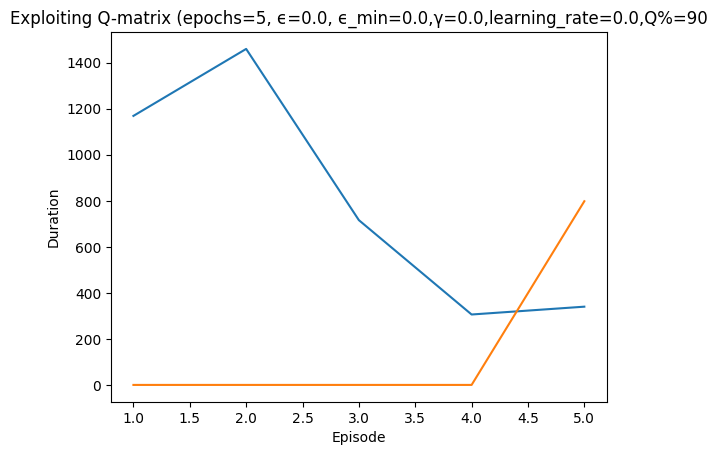

In [9]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        trained=tabularq_run['learner'],
        gamma=0.0,
        learning_rate=0.0,
        exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix"
)

In [10]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

###### DQL
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/50 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||/home/wiblum/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:382: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 1176|reward: 6276.0|last_reward_at: 1176|Elapsed Time: 0:01:32||


  Episode 1 ended at t=1176 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/242 (0.05)
    explore-remote: 15/340 (0.04)
    explore-connect: 3/355 (0.01)
    exploit-local: 4/51 (0.07)
    exploit-remote: 2/96 (0.02)
    exploit-connect: 8/46 (0.15)
  exploit deflected to exploration: 24
  ## Episode: 2/50 'DQL' ϵ=0.7325, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 257|reward: 6224.0|last_reward_at:  257|Elapsed Time: 0:00:28||


  Episode 2 ended at t=257 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/44 (0.08)
    explore-remote: 10/61 (0.14)
    explore-connect: 1/62 (0.02)
    exploit-local: 11/32 (0.26)
    exploit-remote: 0/11 (0.00)
    exploit-connect: 10/11 (0.48)
  exploit deflected to exploration: 6
  ## Episode: 3/50 'DQL' ϵ=0.7008, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 554|reward: 6294.0|last_reward_at:  554|Elapsed Time: 0:01:10||


  Episode 3 ended at t=554 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/109 (0.07)
    explore-remote: 19/135 (0.12)
    explore-connect: 0/134 (0.00)
    exploit-local: 12/48 (0.20)
    exploit-remote: 1/54 (0.02)
    exploit-connect: 11/23 (0.32)
  exploit deflected to exploration: 23
  ## Episode: 4/50 'DQL' ϵ=0.6378, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 525|reward: 6286.0|last_reward_at:  525|Elapsed Time: 0:00:48||


  Episode 4 ended at t=525 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/78 (0.07)
    explore-remote: 10/131 (0.07)
    explore-connect: 1/118 (0.01)
    exploit-local: 14/65 (0.18)
    exploit-remote: 8/60 (0.12)
    exploit-connect: 10/24 (0.29)
  exploit deflected to exploration: 13
  ## Episode: 5/50 'DQL' ϵ=0.5842, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 348|reward: 6270.0|last_reward_at:  348|Elapsed Time: 0:00:40||


  Episode 5 ended at t=348 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/40 (0.13)
    explore-remote: 13/85 (0.13)
    explore-connect: 0/67 (0.00)
    exploit-local: 11/40 (0.22)
    exploit-remote: 4/40 (0.09)
    exploit-connect: 11/31 (0.26)
  exploit deflected to exploration: 1
  ## Episode: 6/50 'DQL' ϵ=0.5516, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 56|reward: 6180.0|last_reward_at:   56|Elapsed Time: 0:00:09||


  Episode 6 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 5/15 (0.25)
    explore-connect: 1/9 (0.10)
    exploit-local: 10/2 (0.83)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 7
  ## Episode: 7/50 'DQL' ϵ=0.5466, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 48|reward: 6188.0|last_reward_at:   48|Elapsed Time: 0:00:07||


  Episode 7 ended at t=48 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 8/5 (0.62)
    explore-connect: 0/7 (0.00)
    exploit-local: 10/1 (0.91)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 5
  ## Episode: 8/50 'DQL' ϵ=0.5423, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 57|reward: 6190.0|last_reward_at:   57|Elapsed Time: 0:00:08||


  Episode 8 ended at t=57 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 7/6 (0.54)
    explore-connect: 0/15 (0.00)
    exploit-local: 10/2 (0.83)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 9/50 'DQL' ϵ=0.5373, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 56|reward: 6190.0|last_reward_at:   56|Elapsed Time: 0:00:09||


  Episode 9 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 6/20 (0.23)
    explore-connect: 0/6 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 9
  ## Episode: 10/50 'DQL' ϵ=0.5324, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 52|reward: 6192.0|last_reward_at:   52|Elapsed Time: 0:00:07||


  Episode 10 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/6 (0.33)
    explore-remote: 7/7 (0.50)
    explore-connect: 0/8 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 11/50 'DQL' ϵ=0.5280, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 52|reward: 6170.0|last_reward_at:   52|Elapsed Time: 0:00:07||


  Episode 11 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/3 (0.50)
    explore-remote: 3/11 (0.21)
    explore-connect: 0/10 (0.00)
    exploit-local: 9/2 (0.82)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 5
  ## Episode: 12/50 'DQL' ϵ=0.5235, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 61|reward: 6192.0|last_reward_at:   61|Elapsed Time: 0:00:08||


  Episode 12 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/5 (0.38)
    explore-remote: 8/12 (0.40)
    explore-connect: 0/11 (0.00)
    exploit-local: 9/2 (0.82)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 13/50 'DQL' ϵ=0.5184, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 47|reward: 6188.0|last_reward_at:   47|Elapsed Time: 0:00:06||


  Episode 13 ended at t=47 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/5 (0.38)
    explore-remote: 7/6 (0.54)
    explore-connect: 0/5 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 14/50 'DQL' ϵ=0.5145, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 50|reward: 6188.0|last_reward_at:   50|Elapsed Time: 0:00:07||


  Episode 14 ended at t=50 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 8/5 (0.62)
    explore-connect: 0/8 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 15/50 'DQL' ϵ=0.5104, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 67|reward: 6196.0|last_reward_at:   67|Elapsed Time: 0:00:09||


  Episode 15 ended at t=67 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/12 (0.25)
    explore-remote: 8/7 (0.53)
    explore-connect: 0/13 (0.00)
    exploit-local: 10/1 (0.91)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 16/50 'DQL' ϵ=0.5049, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 42|reward: 6170.0|last_reward_at:   42|Elapsed Time: 0:00:05||


  Episode 16 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 4/5 (0.44)
    explore-connect: 0/7 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 17/50 'DQL' ϵ=0.5015, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 58|reward: 6186.0|last_reward_at:   58|Elapsed Time: 0:00:11||


  Episode 17 ended at t=58 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/5 (0.44)
    explore-remote: 7/11 (0.39)
    explore-connect: 0/12 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 8
  ## Episode: 18/50 'DQL' ϵ=0.4969, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 53|reward: 6182.0|last_reward_at:   53|Elapsed Time: 0:00:08||


  Episode 18 ended at t=53 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 7/15 (0.32)
    explore-connect: 0/6 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 8
  ## Episode: 19/50 'DQL' ϵ=0.4927, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 40|reward: 6154.0|last_reward_at:   40|Elapsed Time: 0:00:06||


  Episode 19 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 0/11 (0.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 6
  ## Episode: 20/50 'DQL' ϵ=0.4896, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 45|reward: 6160.0|last_reward_at:   45|Elapsed Time: 0:00:07||


  Episode 20 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/13 (0.07)
    explore-connect: 0/7 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 7
  ## Episode: 21/50 'DQL' ϵ=0.4861, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 21|Iteration 40|reward: 6170.0|last_reward_at:   40|Elapsed Time: 0:00:06||


  Episode 21 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 3/5 (0.38)
    explore-connect: 0/6 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 22/50 'DQL' ϵ=0.4830, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 22|Iteration 35|reward: 6180.0|last_reward_at:   35|Elapsed Time: 0:00:05||


  Episode 22 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 7/4 (0.64)
    explore-connect: 0/2 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 23/50 'DQL' ϵ=0.4803, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 23|Iteration 44|reward: 6168.0|last_reward_at:   44|Elapsed Time: 0:00:07||


  Episode 23 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/6 (0.33)
    explore-remote: 3/5 (0.38)
    explore-connect: 0/7 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 3
  ## Episode: 24/50 'DQL' ϵ=0.4770, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 24|Iteration 41|reward: 6176.0|last_reward_at:   41|Elapsed Time: 0:00:07||


  Episode 24 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/6 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 3
  ## Episode: 25/50 'DQL' ϵ=0.4739, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 25|Iteration 39|reward: 6170.0|last_reward_at:   39|Elapsed Time: 0:00:06||


  Episode 25 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 3/5 (0.38)
    explore-connect: 0/4 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 3
  ## Episode: 26/50 'DQL' ϵ=0.4710, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 26|Iteration 44|reward: 6168.0|last_reward_at:   44|Elapsed Time: 0:00:07||


  Episode 26 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 5/4 (0.56)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/1 (0.92)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 27/50 'DQL' ϵ=0.4678, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 27|Iteration 35|reward: 6182.0|last_reward_at:   35|Elapsed Time: 0:00:05||


  Episode 27 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 5/2 (0.71)
    explore-connect: 0/3 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 28/50 'DQL' ϵ=0.4652, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 28|Iteration 95|reward: 6218.0|last_reward_at:   95|Elapsed Time: 0:00:09||


  Episode 28 ended at t=95 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/12 (0.20)
    explore-remote: 5/15 (0.25)
    explore-connect: 0/16 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 6/16 (0.27)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 9
  ## Episode: 29/50 'DQL' ϵ=0.4583, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 29|Iteration 39|reward: 6172.0|last_reward_at:   39|Elapsed Time: 0:00:02||


  Episode 29 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/9 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 30/50 'DQL' ϵ=0.4555, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 30|Iteration 50|reward: 6184.0|last_reward_at:   50|Elapsed Time: 0:00:03||


  Episode 30 ended at t=50 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 5/4 (0.56)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 31/50 'DQL' ϵ=0.4520, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 31|Iteration 51|reward: 6170.0|last_reward_at:   51|Elapsed Time: 0:00:03||


  Episode 31 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 3/6 (0.33)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/3 (0.40)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 32/50 'DQL' ϵ=0.4484, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 32|Iteration 43|reward: 6164.0|last_reward_at:   43|Elapsed Time: 0:00:02||


  Episode 32 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/3 (0.40)
    explore-connect: 0/12 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 33/50 'DQL' ϵ=0.4454, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 33|Iteration 30|reward: 6174.0|last_reward_at:   30|Elapsed Time: 0:00:02||


  Episode 33 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/0 (1.00)
    explore-remote: 2/3 (0.40)
    explore-connect: 0/1 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 34/50 'DQL' ϵ=0.4434, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 34|Iteration 34|reward: 6170.0|last_reward_at:   34|Elapsed Time: 0:00:02||


  Episode 34 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 35/50 'DQL' ϵ=0.4410, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 35|Iteration 41|reward: 6176.0|last_reward_at:   41|Elapsed Time: 0:00:02||


  Episode 35 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 5/3 (0.62)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 36/50 'DQL' ϵ=0.4383, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 36|Iteration 608|reward: 6228.0|last_reward_at:  608|Elapsed Time: 0:00:47||


  Episode 36 ended at t=608 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/54 (0.08)
    explore-remote: 4/93 (0.04)
    explore-connect: 0/101 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 8/253 (0.03)
    exploit-connect: 11/69 (0.14)
  exploit deflected to exploration: 4
  ## Episode: 37/50 'DQL' ϵ=0.3995, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 37|Iteration 43|reward: 6188.0|last_reward_at:   43|Elapsed Time: 0:00:03||


  Episode 37 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/7 (0.30)
    explore-remote: 4/1 (0.80)
    explore-connect: 1/3 (0.25)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/3 (0.77)
  exploit deflected to exploration: 0
  ## Episode: 38/50 'DQL' ϵ=0.3970, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 38|Iteration 33|reward: 6162.0|last_reward_at:   33|Elapsed Time: 0:00:02||


  Episode 38 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 39/50 'DQL' ϵ=0.3950, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 39|Iteration 27|reward: 6156.0|last_reward_at:   27|Elapsed Time: 0:00:01||


  Episode 39 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/0 (NaN)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 40/50 'DQL' ϵ=0.3934, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 40|Iteration 45|reward: 6176.0|last_reward_at:   45|Elapsed Time: 0:00:02||


  Episode 40 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 2/3 (0.40)
    explore-connect: 2/5 (0.29)
    exploit-local: 13/1 (0.93)
    exploit-remote: 1/3 (0.25)
    exploit-connect: 9/1 (0.90)
  exploit deflected to exploration: 0
  ## Episode: 41/50 'DQL' ϵ=0.3908, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 41|Iteration 35|reward: 6164.0|last_reward_at:   35|Elapsed Time: 0:00:02||


  Episode 41 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 42/50 'DQL' ϵ=0.3888, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 42|Iteration 40|reward: 6180.0|last_reward_at:   40|Elapsed Time: 0:00:02||


  Episode 42 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 43/50 'DQL' ϵ=0.3865, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 43|Iteration 53|reward: 6180.0|last_reward_at:   53|Elapsed Time: 0:00:03||


  Episode 43 ended at t=53 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 4/5 (0.44)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 44/50 'DQL' ϵ=0.3834, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 44|Iteration 34|reward: 6162.0|last_reward_at:   34|Elapsed Time: 0:00:02||


  Episode 44 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 45/50 'DQL' ϵ=0.3815, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 45|Iteration 36|reward: 6172.0|last_reward_at:   36|Elapsed Time: 0:00:02||


  Episode 45 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 46/50 'DQL' ϵ=0.3795, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 46|Iteration 33|reward: 6164.0|last_reward_at:   33|Elapsed Time: 0:00:02||


  Episode 46 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/4 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 47/50 'DQL' ϵ=0.3777, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 47|Iteration 28|reward: 6164.0|last_reward_at:   28|Elapsed Time: 0:00:01||


  Episode 47 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/1 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 48/50 'DQL' ϵ=0.3761, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 48|Iteration 46|reward: 6184.0|last_reward_at:   46|Elapsed Time: 0:00:03||


  Episode 48 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 6/6 (0.50)
    explore-connect: 1/5 (0.17)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 0
  ## Episode: 49/50 'DQL' ϵ=0.3736, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 49|Iteration 74|reward: 6202.0|last_reward_at:   74|Elapsed Time: 0:00:07||


  Episode 49 ended at t=74 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 3/14 (0.18)
    explore-connect: 0/8 (0.00)
    exploit-local: 13/5 (0.72)
    exploit-remote: 5/7 (0.42)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 4
  ## Episode: 50/50 'DQL' ϵ=0.3696, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 50|Iteration 52|reward: 6190.0|last_reward_at:   52|Elapsed Time: 0:00:03||


  Episode 50 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 4/7 (0.36)
    explore-connect: 0/9 (0.00)
    exploit-local: 12/2 (0.86)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
simulation ended


In [11]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run['learner'],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL"
)

###### Exploiting DQL
Learning with: episode_count=5,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 23|reward: 6160.0|last_reward_at:   23|Elapsed Time: 0:00:01||


  Episode 1 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 29|reward: 6154.0|last_reward_at:   29|Elapsed Time: 0:00:02||


  Episode 2 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/7 (0.61)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 28|reward: 6160.0|last_reward_at:   28|Elapsed Time: 0:00:02||


  Episode 3 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/2 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/2 (0.86)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 2
  ## Episode: 4/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 24|reward: 6154.0|last_reward_at:   24|Elapsed Time: 0:00:01||


  Episode 4 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/2 (0.85)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:01||


  Episode 5 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


In [12]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search"
)

###### Random search
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Random search' ϵ=1.0000, 


Episode 1|Iteration 7708|reward: 6312.0|last_reward_at: 7708|Elapsed Time: 0:00:27||


  Episode 1 ended at t=7708 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2103 (0.01)
    explore-remote: 20/2757 (0.01)
    explore-connect: 11/2796 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Random search' ϵ=1.0000, 


Episode 2|Iteration 9000|reward: 1314.0|last_reward_at: 8294|Elapsed Time: 0:00:31||


  Episode 2 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2512 (0.01)
    explore-remote: 20/3195 (0.01)
    explore-connect: 10/3242 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Random search' ϵ=1.0000, 


Episode 3|Iteration 9000|reward: 1194.0|last_reward_at: 8840|Elapsed Time: 0:00:31||


  Episode 3 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2461 (0.01)
    explore-remote: 20/3243 (0.01)
    explore-connect: 9/3248 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Random search' ϵ=1.0000, 


Episode 4|Iteration 9000|reward: 1192.0|last_reward_at: 7452|Elapsed Time: 0:00:39||


  Episode 4 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2486 (0.01)
    explore-remote: 20/3266 (0.01)
    explore-connect: 9/3200 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Random search' ϵ=1.0000, 


Episode 5|Iteration 9000|reward:  925.0|last_reward_at: 8897|Elapsed Time: 0:00:23||


  Episode 5 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/2418 (0.01)
    explore-remote: 16/3289 (0.00)
    explore-connect: 7/3256 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


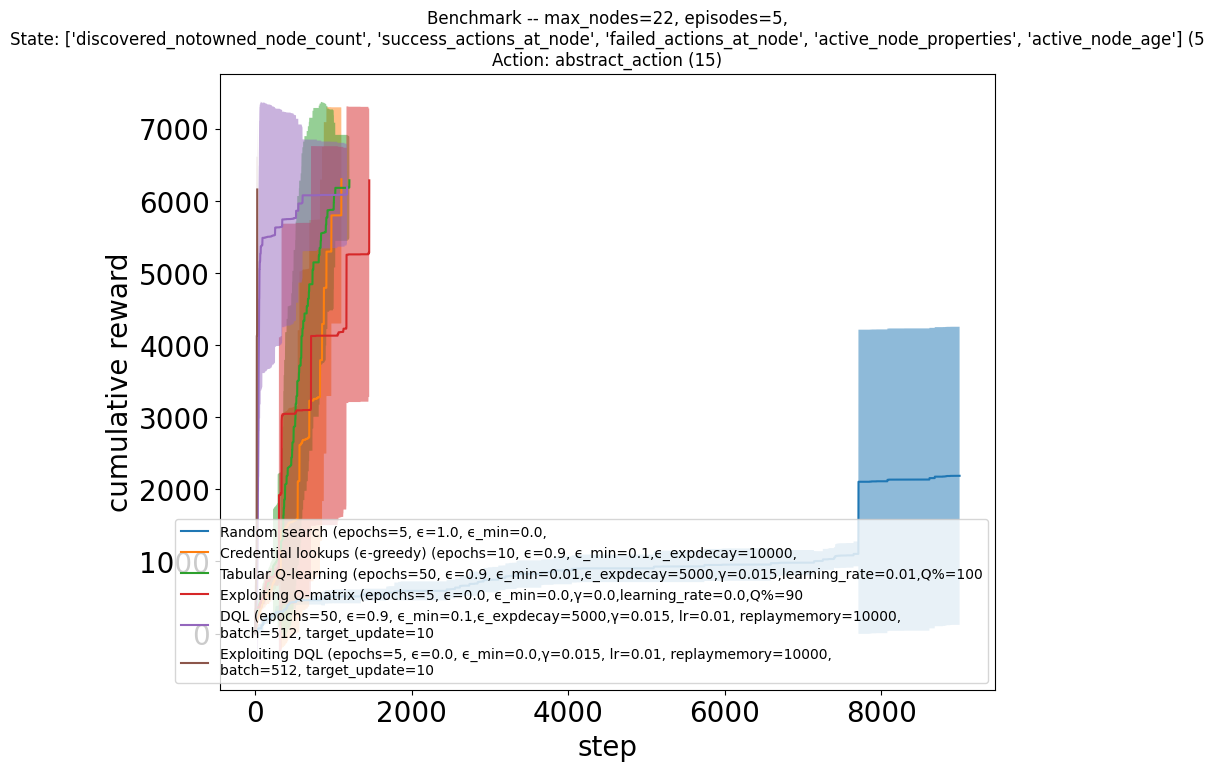

In [13]:
%matplotlib inline 
# Compare and plot results for all the agents
all_runs = [
    random_run,
    credlookup_run,
    tabularq_run,
    tabularq_exploit_run,
    dql_run,
    dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

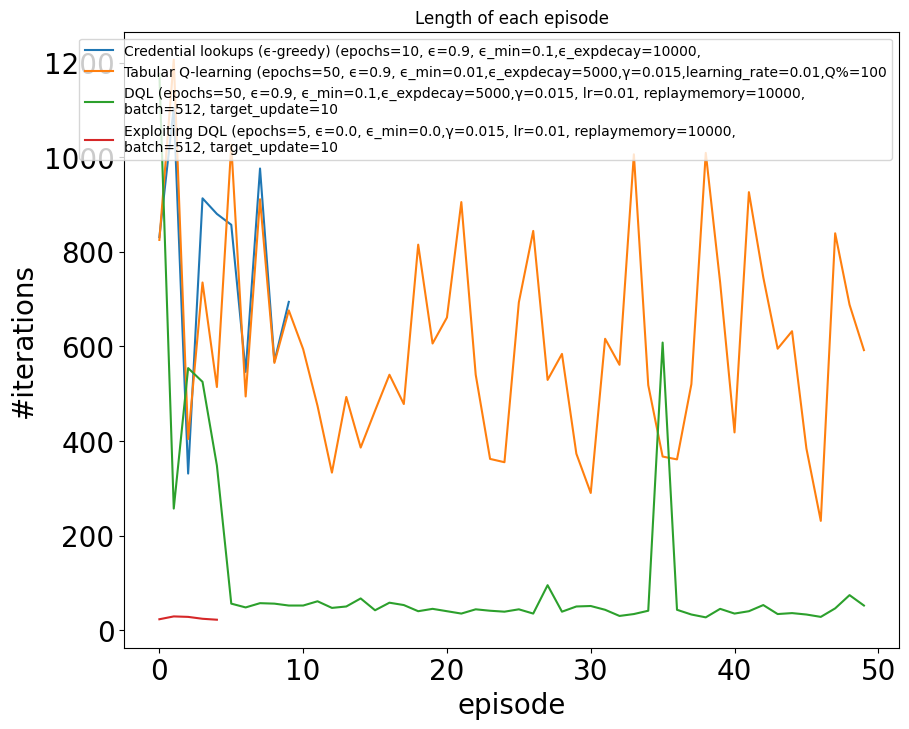

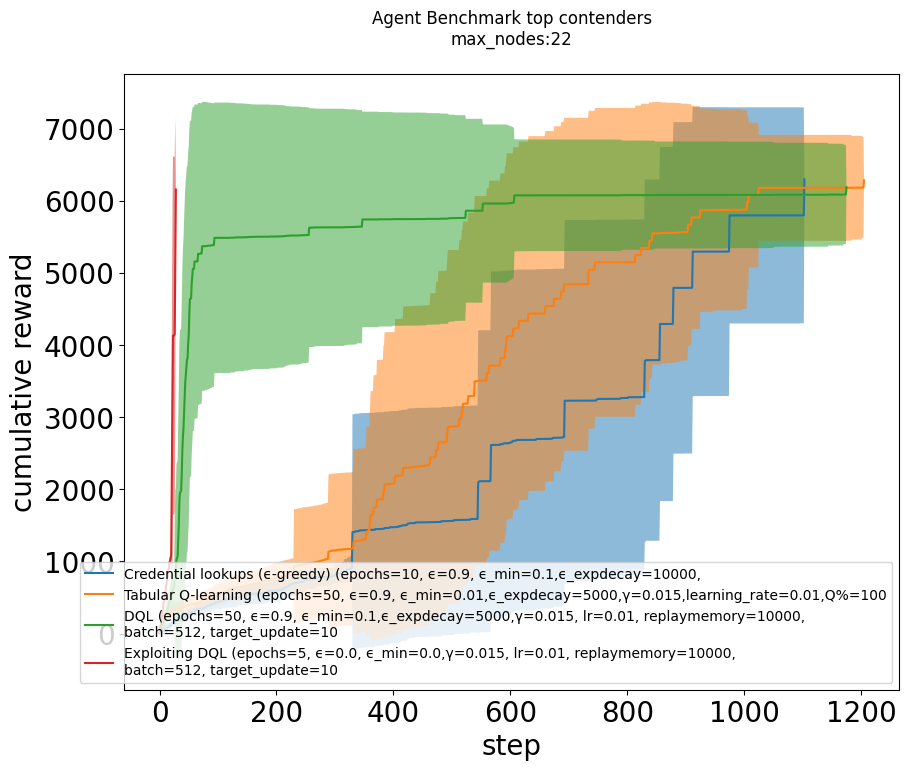

In [14]:
contenders = [
    credlookup_run,
    tabularq_run,
    dql_run,
    dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

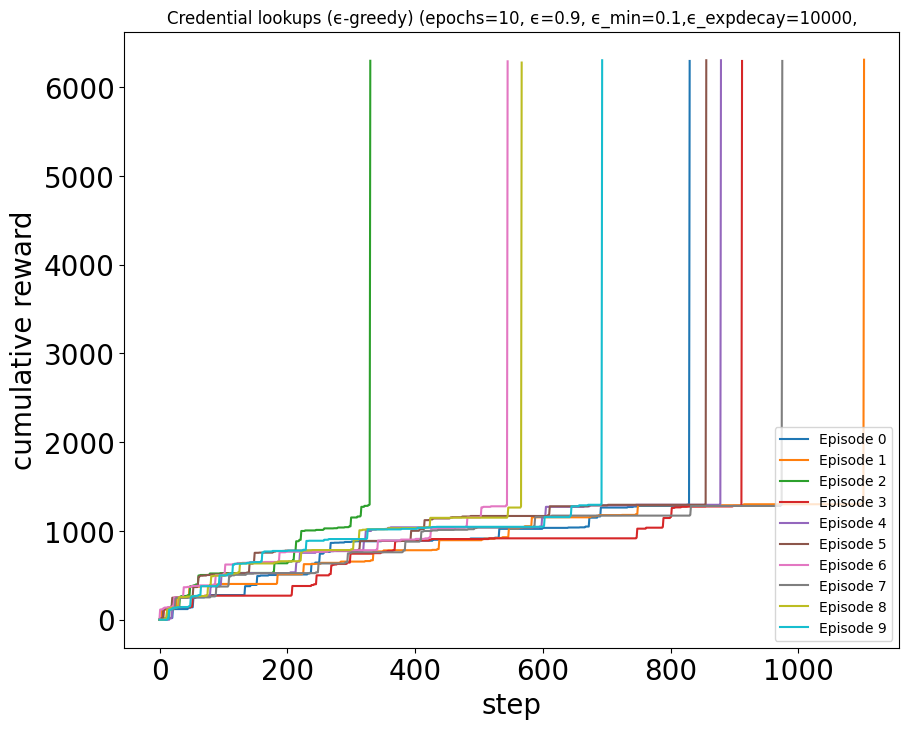

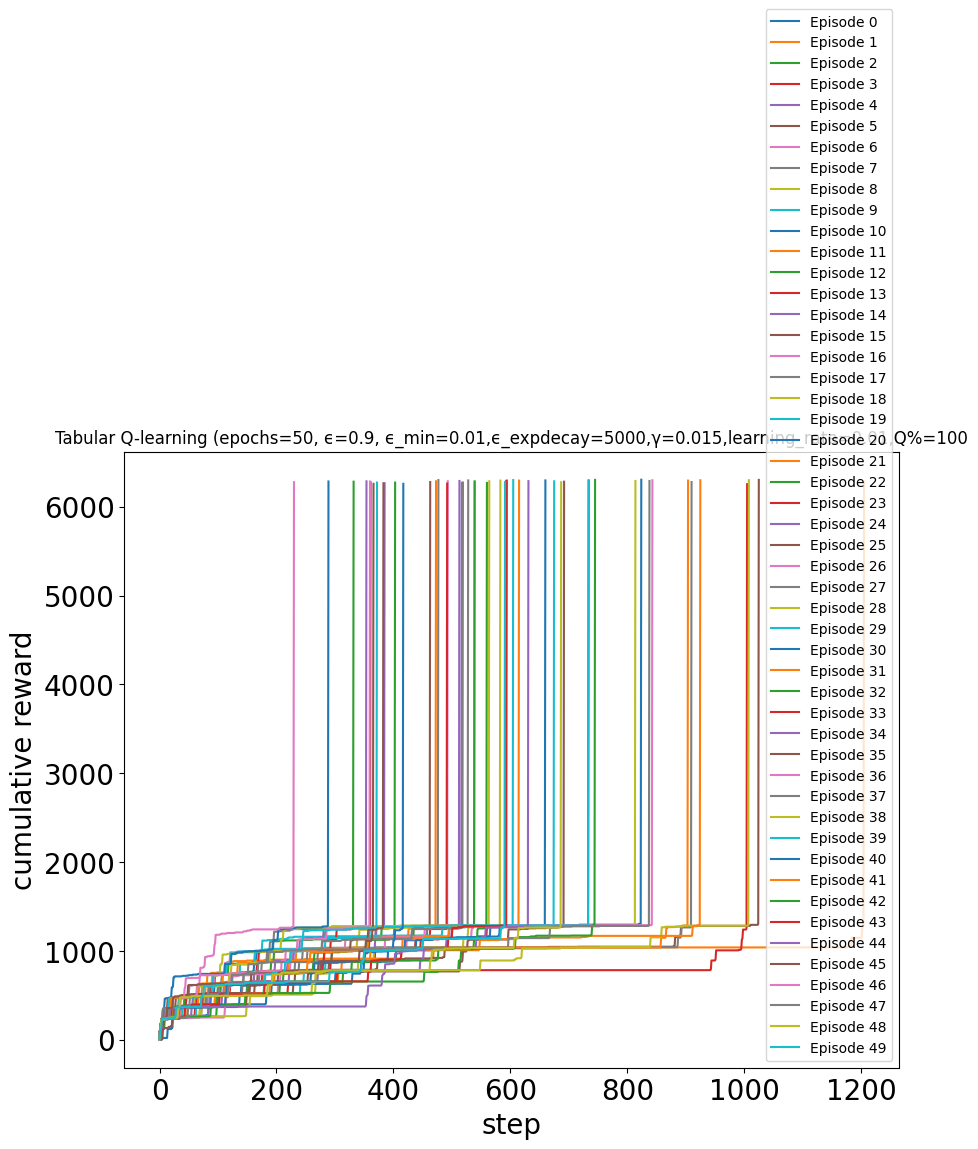

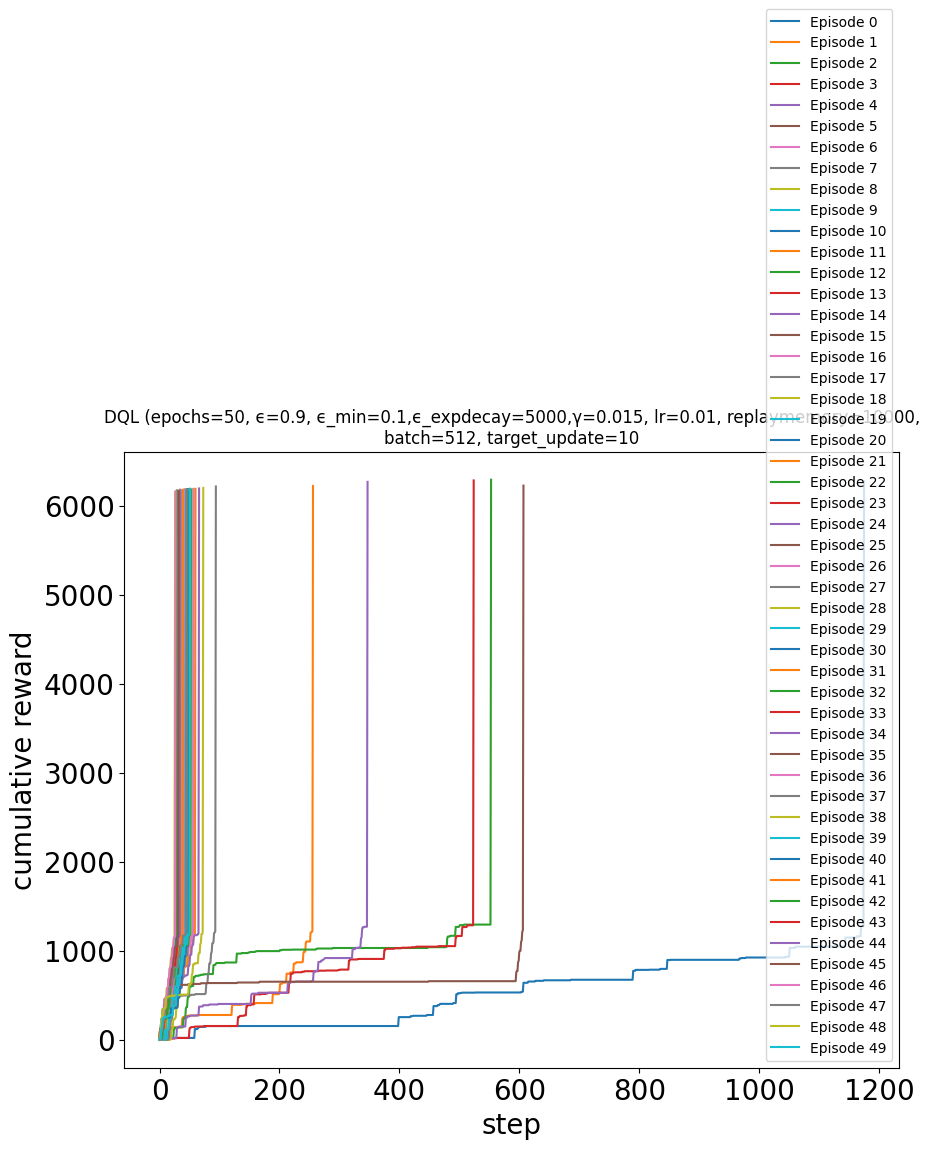

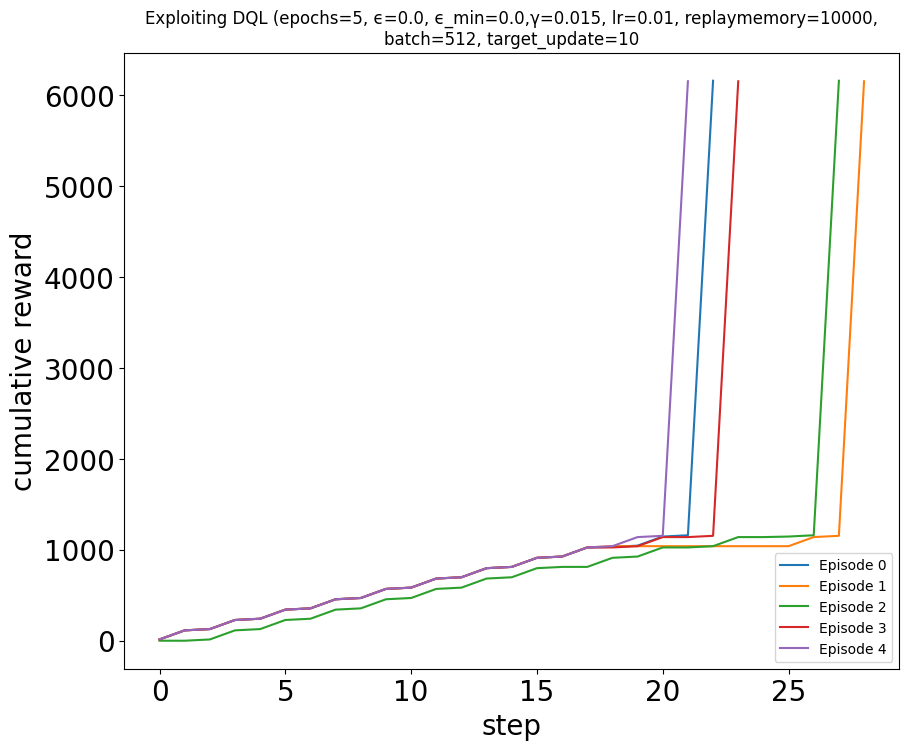

In [15]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)